## Task-3
Даны точки x и y в файле data_for_regression.csv, необходимо построить модель зависимости y от x и дать прогноз y, для x, начиная с последнего значения в файле до x = 15.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
!chcp 65001
!dir

Active code page: 65001
 Volume in drive C is Windows
 Volume Serial Number is E26C-6D7C

 Directory of C:\Users\Nikita\Documents\Р“Р°Р·РїСЂРѕРј (С‚РµСЃС‚РѕРІРѕРµ Р·Р°РґР°РЅРёРµ)\РўРµСЃС‚РѕРІРѕРµ Р·Р°РґР°РЅРёРµ

13.01.2021  09:01    <DIR>          .
13.01.2021  09:01    <DIR>          ..
13.01.2021  09:01    <DIR>          .ipynb_checkpoints
11.01.2021  17:06    <DIR>          Archive
28.04.2020  12:52            18В 292 data_for_regression.csv
06.01.2021  12:33           806В 935 Prediction.csv
06.01.2021  15:03           453В 988 Task-1_v2.ipynb
11.01.2021  17:19            38В 982 Task-2_v3.ipynb
13.01.2021  09:01           218В 123 Task-3_v2.ipynb
12.10.2018  21:27            21В 596 TTF_2.xlsx
04.06.2020  14:20            14В 415 РўРµСЃС‚РѕРІРѕРµ Р·Р°РґР°РЅРёРµ.docx
06.01.2021  20:41         1В 195В 911 РўРµСЃС‚РѕРІРѕРµ_Р·Р°РґР°РЅРёРµ v2.pdf
06.01.2021  20:41         1В 238В 046 РўРµСЃС‚РѕРІРѕРµ_Р·Р°РґР°РЅРёРµ v2.pptx
11.01.2021  17:29         1В 297В 353 РўРµСЃС‚РѕРІРѕРµ_Р·Р°РґР°

In [3]:
regr_data = '.\data_for_regression.csv'

In [4]:
df = pd.read_csv(regr_data, sep=',')

In [5]:
df.sample(5)

,x,y
19,0.478479,1.795791
374,9.418482,7.133876
332,8.360792,4.623107
115,2.896057,1.801495
410,10.325074,11.912363


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
df.describe()

,x,y
count,500.000000,500.000000
mean,6.283185,-inf
std,3.638502,NaN
min,0.000000,-inf
25%,3.141593,3.569493
50%,6.283185,5.868321
75%,9.424778,7.933562
max,12.566371,11.912363


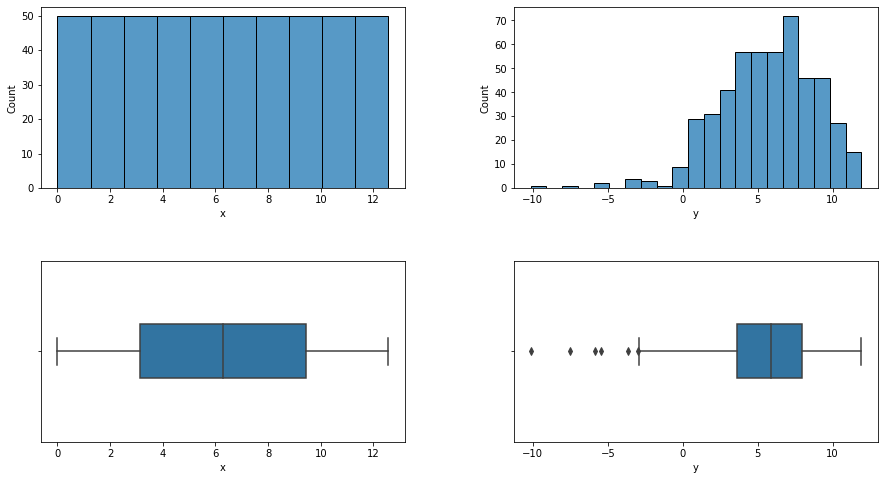

In [8]:
df_without_inf = df['y'].replace([-np.inf, np.int], np.nan)
plt.figure(figsize=(15, 8))
plt.subplot(221)
sns.histplot(df['x'])
plt.subplot(222)
sns.histplot(df_without_inf)
plt.subplot(223)
sns.boxplot(df['x'], width=0.3)
plt.subplot(224)
sns.boxplot(df_without_inf, width=0.3)
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

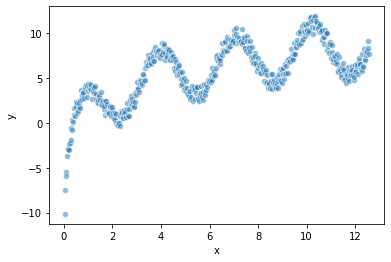

In [9]:
plt.scatter(df['x'], df['y'], edgecolors='white', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
# delete the infinity values
df.replace([-np.inf, np.int], np.nan, inplace=True)
df.dropna(inplace=True)
x = np.array(df['x'])
X = np.reshape(x, [df.shape[0], 1])
y = np.array(df['y'])
y = np.reshape(y, [df.shape[0],])
df.shape

(499, 2)

In [11]:
# Approximated function can be described as superposition of Ln(X) + Cos(X) + (kX+b)
def func(x, ac, xc0, wc, yx, yc0, al, xl0, wl, yl0):
    return ac * np.cos(np.pi * (x - xc0) *wc) + x * yx + yc0 + al * np.log((x - xl0) * wl) + yl0

# first part: Ln(X)
def func1(x, al, xl0, wl, yl0):
    return al * np.log((x - xl0) * wl) + yl0

# second part: Cos(X) + kX+b
def func2(x, ac, xc0, wc, yx, yc0):
    return ac * np.cos(np.pi * (x - xc0) *wc) + x * yx + yc0

In [12]:
y1 = y
popt1, pcov1 = curve_fit(func1, x, y1, (0.5, 0., 2., 0.), maxfev=10**6)
al, xl0, wl, yl0 = popt1
popt1

array([ 2.41140285,  0.01907919,  2.35101537, -0.13412265])

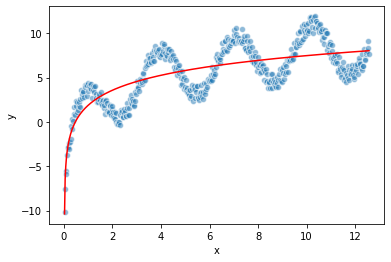

In [13]:
plt.scatter(x, y1, edgecolors='white', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, func1(x, *popt1), color='red')

In [14]:
y2 = y1 - al * np.log((x - xl0) * wl) + yl0
popt2, pcov2 = curve_fit(func2, x, y2, (3., 1., 0.5, 0.1, 0.), maxfev=10**6)
ac, xc0, wc, yx, yc0 = popt2
popt2

array([-2.93262715,  2.37463497,  0.63795222,  0.11973006, -1.02206083])

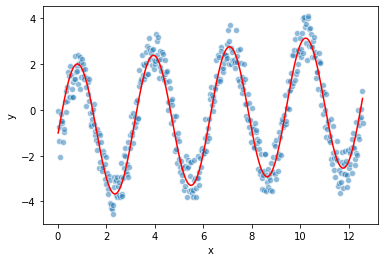

In [15]:
plt.scatter(x, y2, edgecolors='white', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, func2(x, *popt2), color='red')

In [16]:
y_approx = func(x, *popt2, *popt1)
r2_score(y, y_approx), mean_squared_error(y, y_approx), np.sqrt(mean_squared_error(y, y_approx))

(0.9594099490244831, 0.4230895964347729, 0.6504533776027094)

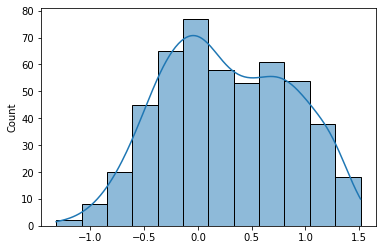

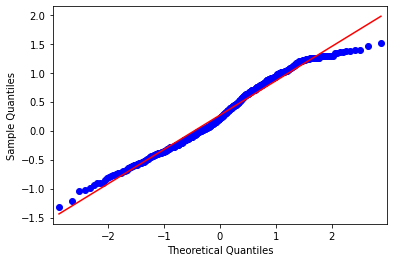

In [30]:
# There is some deviation from normal distribution in high values. Never the less, it is close to ND relying on QQ plot 
from statsmodels.graphics.gofplots import qqplot
sns.histplot(y-y_approx, kde=True)
qqplot(y-y_approx, line='s')
plt.show()

In [55]:
# Add noise according to standart deviation
def add_noise(x, stand_deviation):
    return np.random.normal(scale=stand_deviation, size=len(x))

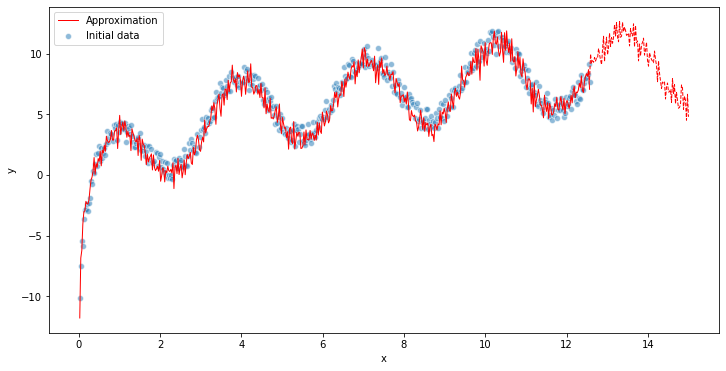

In [58]:
x_extra = np.linspace(x[-1], 15, 100)
sd = np.sqrt(mean_squared_error(y, y_approx))

plt.figure(figsize=(12, 6))
plt.scatter(x, y, edgecolors='white', alpha=0.5, label='Initial data')
plt.plot(x, func(x, *popt2, *popt1) + add_noise(x, sd), color='red', label='Approximation', linewidth=1)
plt.plot(x_extra, func(x_extra,*popt2, *popt1) + add_noise(x_extra, sd), color='red', linestyle='dashed', linewidth=1)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [59]:
# uncomment the line below for saving to csv file
y_extra = func(x_extra, *popt2, *popt1) + add_noise(x_extra, sd)
df_extra = pd.DataFrame({'x': x_extra, 'y': y_extra})
# df_extra.to_csv('.\extrapolated_data.csv', index=False, encoding='utf-8')
df_extra

,x,y
0,12.566371,8.925529
1,12.590953,8.791868
2,12.615535,9.591150
3,12.640117,9.095971
4,12.664699,8.740903
...,...,...
95,14.901672,6.985909
96,14.926254,6.374194
97,14.950836,5.831056
98,14.975418,7.819670
